In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.7 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data1=pd.read_csv('/content/news_articles.csv')

In [ ]:
data2=pd.read_csv('/content/news_articles_2.csv')
data3=pd.read_csv('/content/news_articles_3.csv')
data4=pd.read_csv('/content/news_articles_4.csv')
data5=pd.read_csv('/content/news_articles_5.csv')

In [ ]:
data=pd.concat([data1,data2,data3,data4,data5])

In [ ]:
data.head()

,Asset,Headline,Source,Posted,Description
0,MRNA,China's Stemirna halts work at planned mRNA va...,Reuters via Yahoo News,· 10 hours ago,China's Stemirna Therapeutics said on Wednesda...
1,MRNA,Moderna to Report Second Quarter 2023 Financia...,StreetInsider,· 5 days ago,"CAMBRIDGE, MA / ACCESSWIRE / July 13, 2023 / M..."
2,MRNA,Experts rubbish Covid vaccine 'detoxification'...,AFP via Yahoo News,· 1 day ago,"Sponsored social media posts advertise a ""deto..."
3,MRNA,"As pandemic raged, global south lacked vaccine...",Washington Post,· 3 days ago,"Never again, they vowed, would they allow them..."
4,MRNA,Is Novavax Stock A Buy Or A Sell As Shares Sta...,Investor's Business Daily,· 5 days ago,Novavax uses a protein-based technology that i...


In [ ]:
from torch.nn import Softmax

In [ ]:
softmax = Softmax(dim=1)
sentiment_scores = []

In [ ]:

# Set the threshold for the minimum required sentiment score (adjust as needed)
threshold = 0.60

# Create an empty DataFrame to store the "sure" news articles
columns = ['Asset', 'Headline', 'Description', 'Sentiment', 'SentimentScore']
sure_news_df = pd.DataFrame(columns=columns)

# Loop through each row in the original DataFrame
for index, row in data.iterrows():
    asset = row["Asset"]
    headline = row["Headline"]
    text = row["Description"]

    # Tokenize the input text
    inputs = tokenizer.encode_plus(text, return_tensors="pt", add_special_tokens=True)
    input_ids = inputs["input_ids"]
    attention_mask = inputs["attention_mask"]

    # Make predictions
    outputs = model(input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    probabilities = softmax(logits)[0]
    predicted_class_idx = logits.argmax().item()
    predicted_class = model.config.id2label[predicted_class_idx]
    sentiment_score = probabilities[predicted_class_idx].item()

    # Check if the sentiment score is above the threshold
    if sentiment_score >= threshold:
        # Append the "sure" news article to the sure_news_df DataFrame
        sure_news_df = sure_news_df.append({'Asset': asset, 'Headline': headline, 'Description': text, 'Sentiment': predicted_class, 'SentimentScore': sentiment_score}, ignore_index=True)

# Print the DataFrame with "sure" news articles
print(sure_news_df)


<ipython-input-11-a6efae31b847>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sure_news_df = sure_news_df.append({'Asset': asset, 'Headline': headline, 'Description': text, 'Sentiment': predicted_class, 'SentimentScore': sentiment_score}, ignore_index=True)
<ipython-input-11-a6efae31b847>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sure_news_df = sure_news_df.append({'Asset': asset, 'Headline': headline, 'Description': text, 'Sentiment': predicted_class, 'SentimentScore': sentiment_score}, ignore_index=True)
<ipython-input-11-a6efae31b847>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sure_news_df = sure_news_df.append({'Asset': asset, 'Headline': headline, 'Description': text, 'Sentiment': predicted_class, 'S

    Asset                                           Headline  \
0    MRNA  China's Stemirna halts work at planned mRNA va...   
1    MRNA  Moderna to Report Second Quarter 2023 Financia...   
2    MRNA  Experts rubbish Covid vaccine 'detoxification'...   
3    MRNA  As pandemic raged, global south lacked vaccine...   
4    MRNA  Is Novavax Stock A Buy Or A Sell As Shares Sta...   
..    ...                                                ...   
578  HSBC  HSBC Trustee outlines course of action for Sab...   
579  HSBC  HSBC Expands Green Finance and Bond Teams in C...   
580  HSBC  Geneos Wealth Management Inc. Reduces Position...   
581  HSBC             HSBC (NYSE:HSBC) PT Lowered to GBX 675   
582  HSBC  HSBC Innovation Banking UK Backs Cross-Border ...   

                                           Description Sentiment  \
0    China's Stemirna Therapeutics said on Wednesda...  negative   
1    CAMBRIDGE, MA / ACCESSWIRE / July 13, 2023 / M...   neutral   
2    Sponsored social media

In [ ]:
sure_news_df.head()

,Asset,Headline,Description,Sentiment,SentimentScore
0,MRNA,China's Stemirna halts work at planned mRNA va...,China's Stemirna Therapeutics said on Wednesda...,negative,0.961897
1,MRNA,Moderna to Report Second Quarter 2023 Financia...,"CAMBRIDGE, MA / ACCESSWIRE / July 13, 2023 / M...",neutral,0.794511
2,MRNA,Experts rubbish Covid vaccine 'detoxification'...,"Sponsored social media posts advertise a ""deto...",neutral,0.897545
3,MRNA,"As pandemic raged, global south lacked vaccine...","Never again, they vowed, would they allow them...",neutral,0.809467
4,MRNA,Is Novavax Stock A Buy Or A Sell As Shares Sta...,Novavax uses a protein-based technology that i...,positive,0.754185


In [ ]:
positive_neutral_df = sure_news_df[(sure_news_df['Sentiment'].isin(['positive', 'neutral']))]

# Calculate the cumulative sentiment scores for each stock
cumulative_scores = positive_neutral_df.groupby('Asset')['SentimentScore'].sum().reset_index()

# Sort the stocks based on their cumulative scores in descending order
sorted_stocks = cumulative_scores.sort_values(by='SentimentScore', ascending=False)

# Print the stocks with high cumulative positive and neutral scores
print(sorted_stocks)

   Asset  SentimentScore
2  GOOGL      103.634427
0   AAPL       72.669408
5    JPM       58.556059
6     KR       51.316478
8    PFE       45.673611
9    WMT       28.016846
1   COST       21.689963
7   MRNA       11.793151
4    JNJ        5.318500
3   HSBC        3.616775


In [ ]:
import pandas as pd

# Assuming you have already obtained the 'sure_news_df' DataFrame as mentioned earlier

# Filter the DataFrame to include only 'positive' sentiment articles
positive_news_df = sure_news_df[sure_news_df['Sentiment'] == 'positive']

# Calculate the cumulative positive score for each stock
cumulative_scores = positive_news_df.groupby('Asset')['SentimentScore'].sum()

# Sort the stocks based on the cumulative positive score in descending order
sorted_stocks = cumulative_scores.sort_values(ascending=False)

# Get the top stocks with a high cumulative positive score
top_stocks = sorted_stocks.head(5)  # Change '5' to the desired number of top stocks

# Display the top stocks with a high cumulative positive score
print(top_stocks)


Asset
JPM      44.840748
AAPL     37.944130
PFE      20.305698
GOOGL    19.956889
KR       15.130083
Name: SentimentScore, dtype: float64


In [ ]:
# asset=['JPM',"KR","JNJ","MRNA","^IXIC"]
asset=['JPM',"AAPL","KR","PFE","GOOGL"]
#asset=["JPM","AAPL","GOOGL"]

In [ ]:
df_prices=pd.DataFrame()

In [ ]:
import datetime
import yfinance as yf

In [ ]:
initial_date = datetime.datetime(2018, 7, 20)
today = datetime.datetime.today()


In [ ]:
def datosYahoo(dataframe,asset_list,start,finish):
  for i in asset_list:
    try:
      stock_data = yf.download(i, start=start, end=finish)
      dataframe[i] = stock_data["Adj Close"]
    except Exception as e:
      print(f"Error retrieving data for {i}: {str(e)}")
  return dataframe
    #     dataframe[i] = data.DataReader(i,data_source='yahoo',start= start , end=finish)["Adj Close"]
    # return dataframe

In [ ]:
df3 = datosYahoo(df_prices, asset, initial_date, today)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

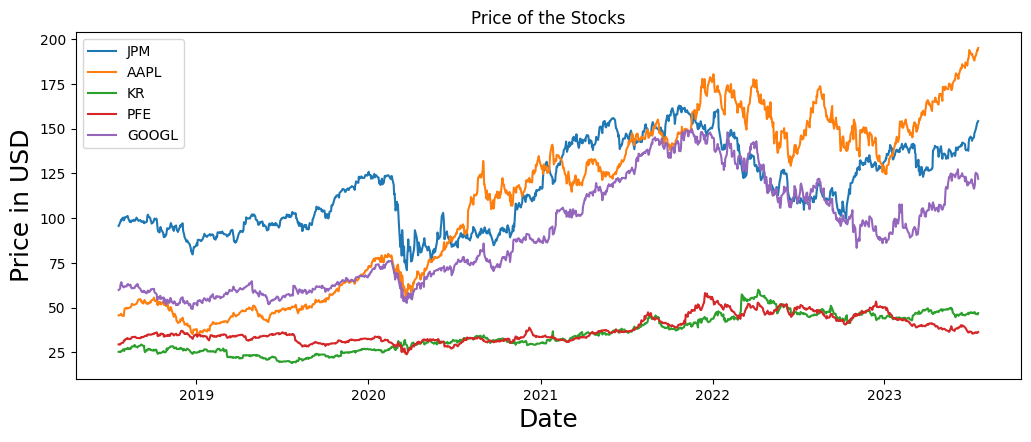

In [ ]:
plt.figure(figsize=(12.2,4.5))
for i in df3.columns.values:
    plt.plot( df3[i],  label=i)
plt.title('Price of the Stocks')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price in USD',fontsize=18)
plt.legend(df3.columns.values, loc='upper left')
plt.show()


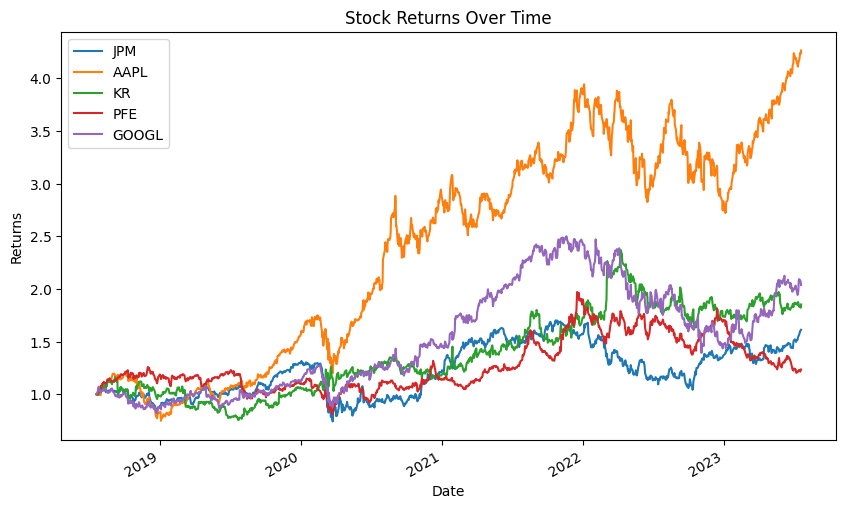

In [ ]:
returns = df3 / df3.iloc[0]

# Plot the returns
returns.plot(figsize=(10, 6))
plt.title('Stock Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

In [ ]:
!pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.6 MB/s eta 0:00:00


In [ ]:
# df_assets =  df3.loc[:, df3.columns != '^IXIC']
# df_assets


In [ ]:
#HRP hierarchical Risk parity
#no need to normalize
from pypfopt import HRPOpt

In [ ]:
#returns = df_assets.pct_change().dropna()

In [ ]:
from pypfopt import HRPOpt
returns = df3.pct_change().dropna()
hrp = HRPOpt(returns)
hrp_weights = hrp.optimize()
hrp.portfolio_performance(verbose=True)
print(dict(hrp_weights))

Expected annual return: 15.4%
Annual volatility: 19.7%
Sharpe Ratio: 0.68
{'AAPL': 0.09975711002835111, 'GOOGL': 0.10802833238791021, 'JPM': 0.18041923751484865, 'KR': 0.2629714679672275, 'PFE': 0.34882385210166256}


In [ ]:
total_weight = sum(hrp_weights.values())
normalized_hrp_weights = {asset: weight / total_weight for asset, weight in hrp_weights.items()}

hrp.portfolio_performance(verbose=True)
print(dict(normalized_hrp_weights))

Expected annual return: 15.4%
Annual volatility: 19.7%
Sharpe Ratio: 0.68
{'AAPL': 0.09975711002835111, 'GOOGL': 0.10802833238791021, 'JPM': 0.18041923751484865, 'KR': 0.2629714679672275, 'PFE': 0.34882385210166256}


In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df3)

In [ ]:
#discreate allocation using weights
da_hrp = DiscreteAllocation(hrp_weights, latest_prices, total_portfolio_value=100000)
allocation, leftover = da_hrp.greedy_portfolio()
print("Discrete allocation (HRP):", allocation)
print("Funds remaining (HRP): ${:.2f}".format(leftover))

Discrete allocation (HRP): {'PFE': 957, 'KR': 559, 'JPM': 117, 'GOOGL': 89, 'AAPL': 51}
Funds remaining (HRP): $7.08


In [ ]:
from pypfopt import expected_returns

In [ ]:
rets=expected_returns.returns_from_prices(df3)
rets.tail()

,JPM,AAPL,KR,PFE,GOOGL
Date,,,,,
2023-07-13,0.004860,0.004057,-0.007392,0.001945,0.047171
2023-07-14,0.006046,0.000787,-0.011915,0.007210,0.007066
2023-07-17,0.024104,0.017306,0.002153,-0.012665,-0.006139
2023-07-18,0.001826,-0.001340,-0.007091,0.010597,-0.007140
2023-07-19,0.003840,0.007072,0.016663,0.005519,-0.013979


In [ ]:

from pypfopt import HRPOpt

In [ ]:
hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()
weights


OrderedDict([('JPM', 0.18042),
             ('AAPL', 0.09976),
             ('KR', 0.26297),
             ('PFE', 0.34882),
             ('GOOGL', 0.10803)])

In [ ]:

hrp.portfolio_performance(verbose=True);

Expected annual return: 15.4%
Annual volatility: 19.7%
Sharpe Ratio: 0.68


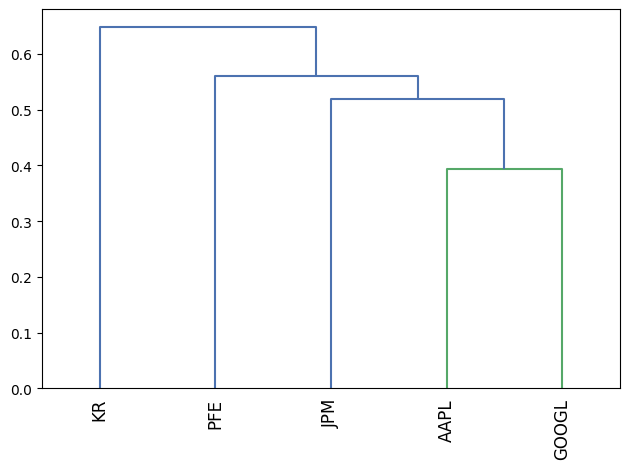

In [ ]:
from pypfopt import plotting

plotting.plot_dendrogram(hrp);

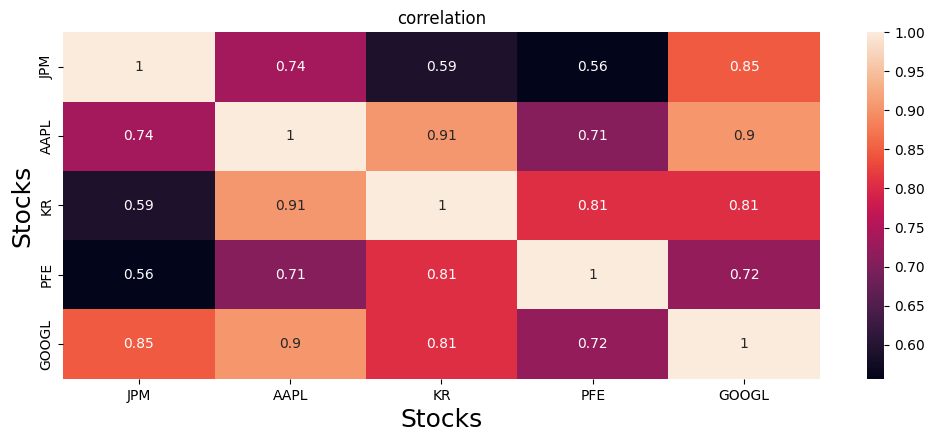

In [ ]:
correlation_mat = df3.corr()
plt.figure(figsize=(12.2,4.5))
sns.heatmap(correlation_mat, annot = True)
plt.title('correlation')
plt.xlabel('Stocks',fontsize=18)
plt.ylabel('Stocks',fontsize=18)
plt.show()

Refernce: https://pub.towardsai.net/portfolio-optimization-in-python-83fa20b02241